<a href="https://colab.research.google.com/github/alexaziegler/predicting-customer-churn/blob/main/Predicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

# Anaconda prompt
#!pip install -U imbalanced-learn

#conda install -c conda-forge imbalanced-learn

# Restart the kernel after successful installation of the library

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

*   The data has 10,127 rows and 21 columns
*   Right away I see ordered and un-ordered data plus many category columns that will need to be cleaned
*   There are columns such as education level that have Null values that will need to be cleaned
*   The target variable is attrition_flag, and there are 1627 instances where a customer attrited against 8500 non-attrited





In [ ]:
#checking the shape of the dataset
df.shape

(10127, 21)

In [ ]:
#reviewing column headers and a sample of values
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [ ]:
#I decided to cast all columns names to lower case for less chance of errors
df.columns = df.columns.str.lower()

In [ ]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           8608 non-null   object 
 6   marital_status            9378 non-null   object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [ ]:
#checking for null values
df.isnull().sum()

clientnum                      0
attrition_flag                 0
customer_age                   0
gender                         0
dependent_count                0
education_level             1519
marital_status               749
income_category                0
card_category                  0
months_on_book                 0
total_relationship_count       0
months_inactive_12_mon         0
contacts_count_12_mon          0
credit_limit                   0
total_revolving_bal            0
avg_open_to_buy                0
total_amt_chng_q4_q1           0
total_trans_amt                0
total_trans_ct                 0
total_ct_chng_q4_q1            0
avg_utilization_ratio          0
dtype: int64

In [ ]:
#checking the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clientnum,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
customer_age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
total_relationship_count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
months_inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
contacts_count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
credit_limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
total_revolving_bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
avg_open_to_buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [ ]:
#checking balance of target variable
df['attrition_flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

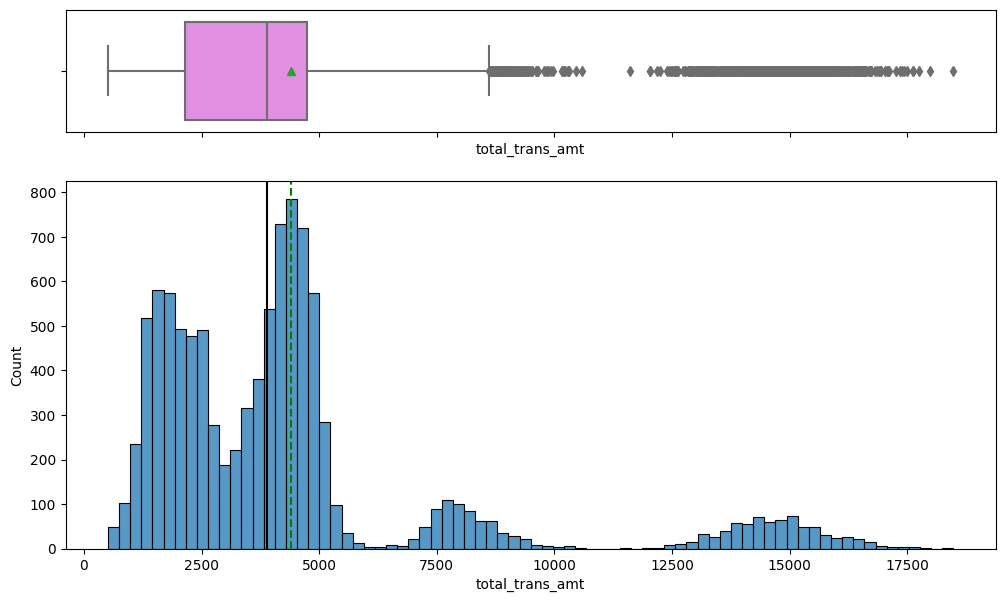

In [ ]:
#How is the total transaction amount distributed?
histogram_boxplot(df, 'total_trans_amt', figsize=(12, 7), kde=False, bins=None)

The total transaction amount distribution is right skewed and multimodal where the mean is roughly $3,750. There are many outliers.

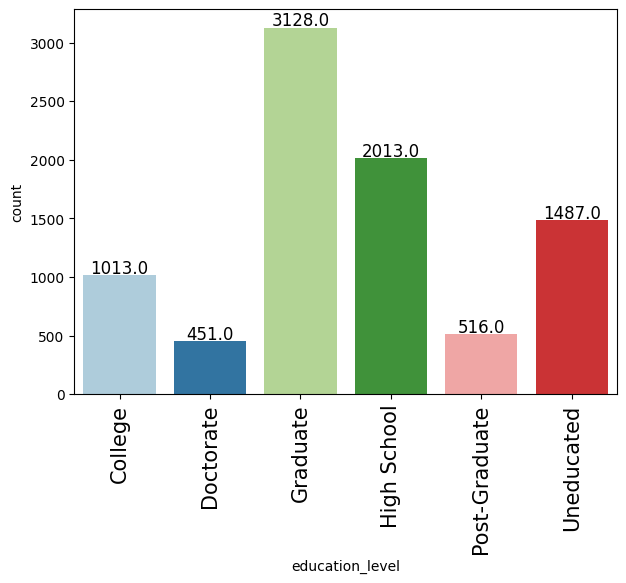

In [ ]:
#What is the distribution of the level of education of customers?
labeled_barplot(df, 'education_level', perc=False, n=None)

Most customers have a graduate degree, with 3128 instances. The least amount of customers have a doctorate degree.

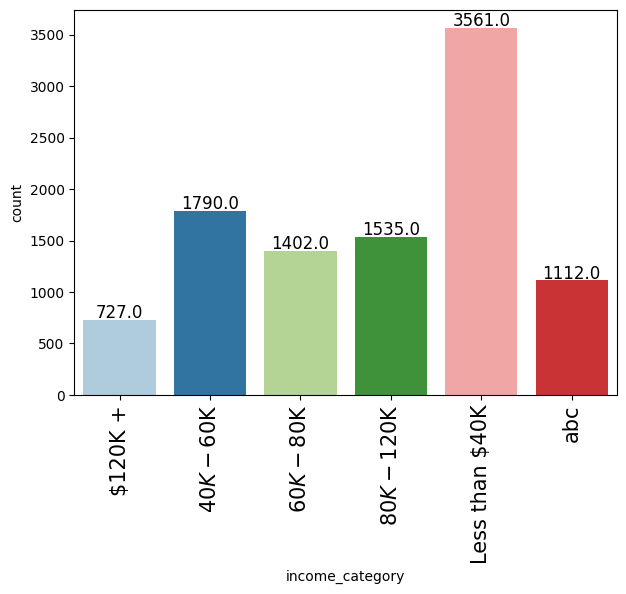

In [ ]:
#What is the distribution of the level of income of customers?
labeled_barplot(df, 'income_category', perc=False, n=None)

The distribution of the level of income of customers is majority have incomes of less than $40k and the smallest group is making over $120k.

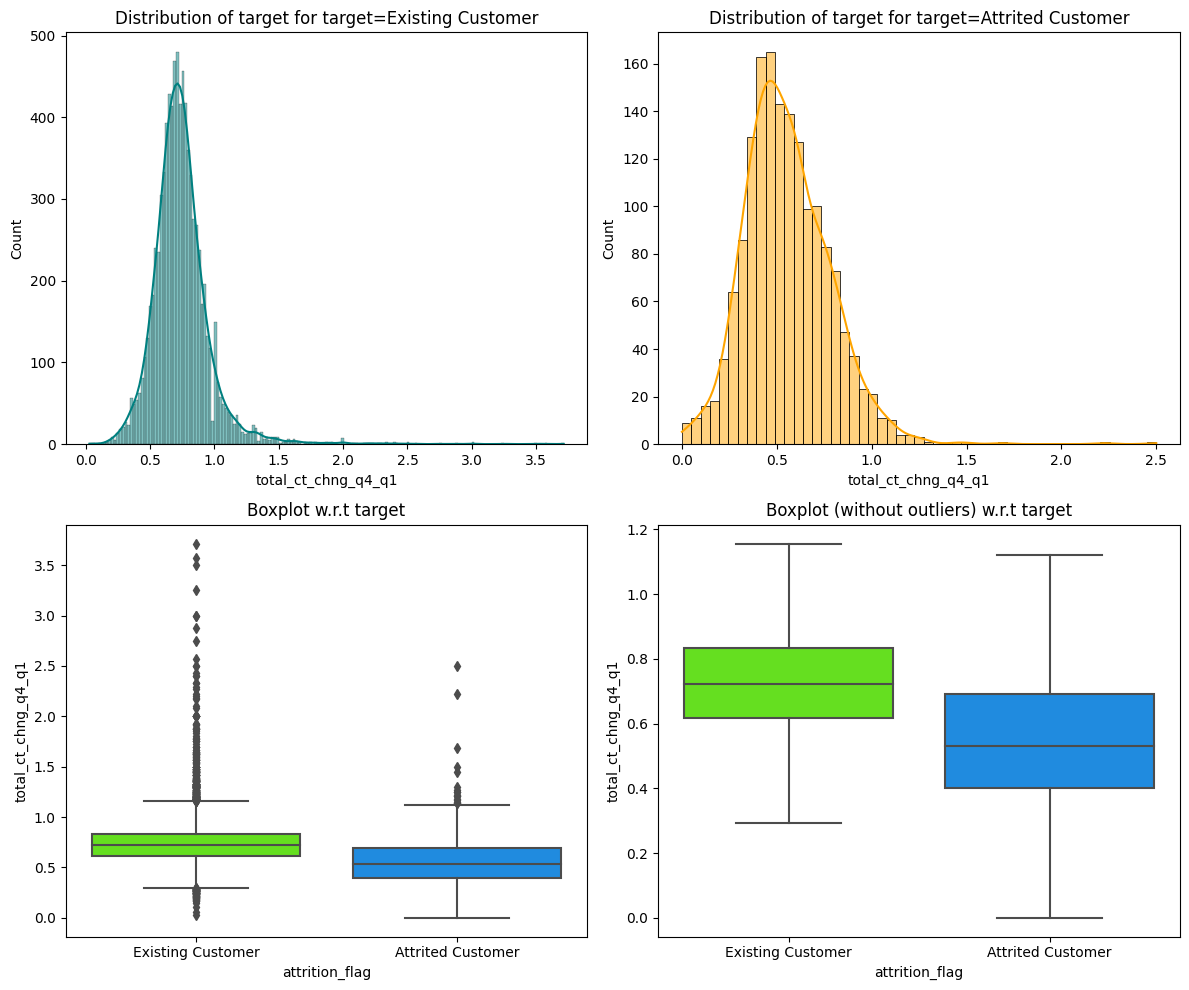

In [ ]:
#How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?
distribution_plot_wrt_target(df,'total_ct_chng_q4_q1','attrition_flag')

The attrited customers had a much smaller change in transaction amount with 50% having less than 5 transactions from Q4 to Q1 whereas non attrited customers had 7.

attrition_flag          Attrited Customer  Existing Customer    All
months_inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


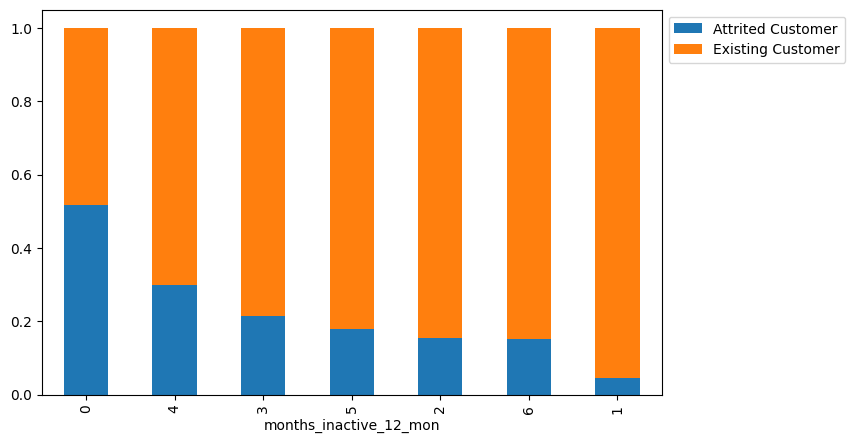

In [ ]:
#How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?
stacked_barplot(df,'months_inactive_12_mon', 'attrition_flag')

Most attrited customers have been inactive for 3 months.

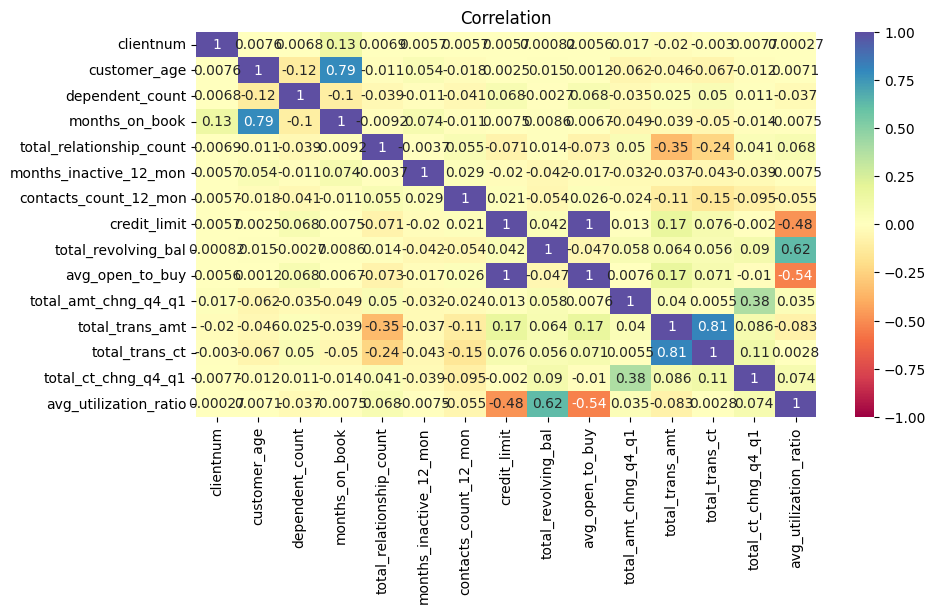

In [ ]:
#What are the attributes that have a strong correlation with each other?
#creating a heatmap to visualize the correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title('Correlation')
plt.show()

The attributes with strong correlation are months_on_book and customer_age, total_revolving_bal and avg_utilization_ratio and total_trans_ct and total_trans_amt.
The least correlated is avg_open_to_buy and avg_utilization_ratio.

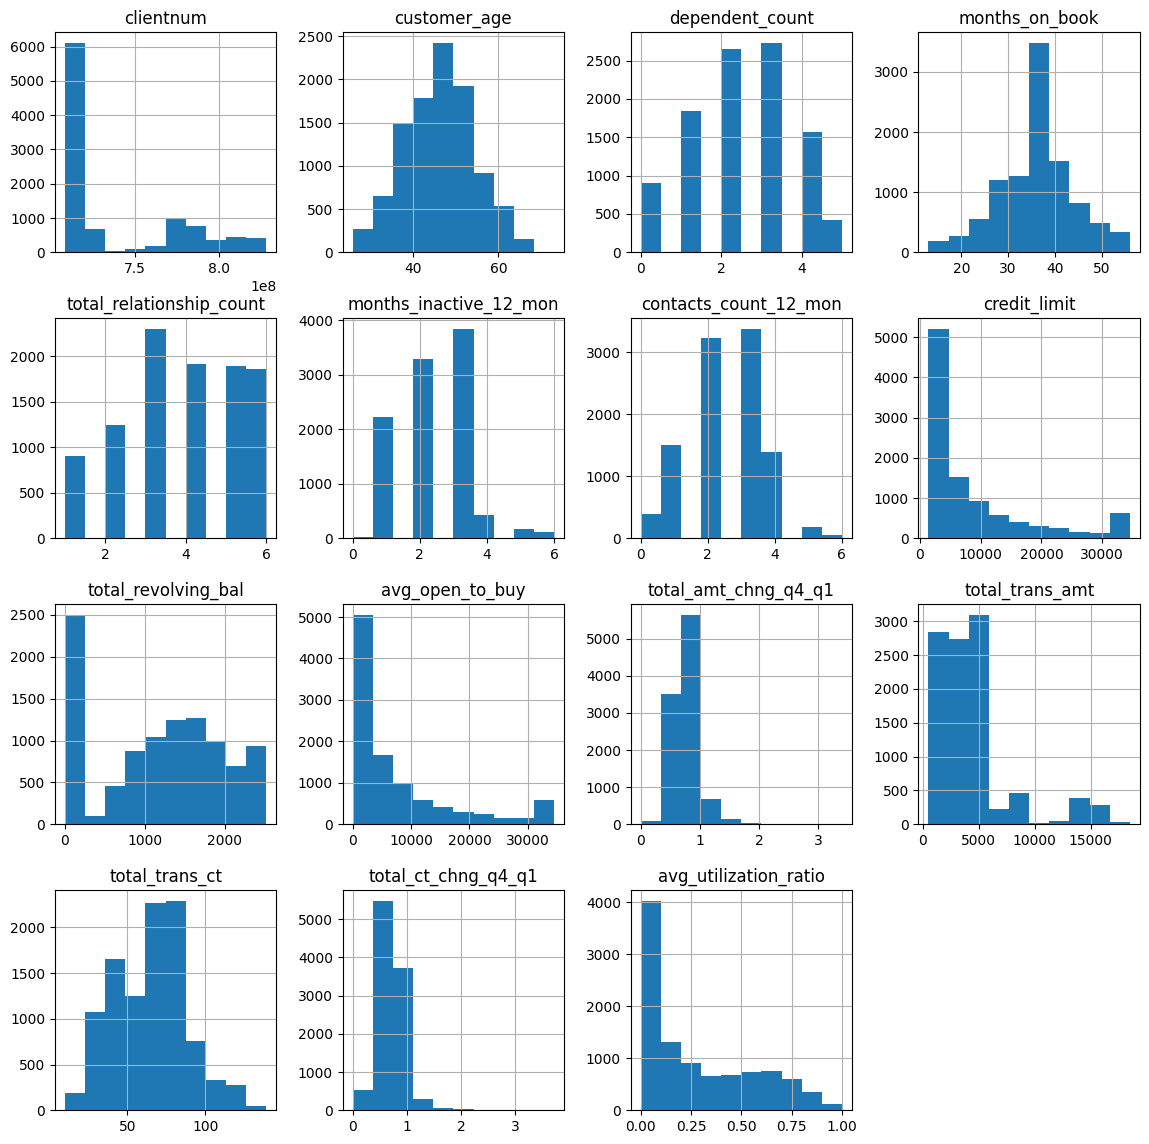

In [ ]:
df.hist(figsize=(14, 14))
plt.show()

Customer_age, dependent_count, months_on_book have mostly a normal distribution, while credit_limit, total_revolving_bal, avg_open_to_buy, avg_utilization_ratio are right skewed.

attrition_flag     1     0    All
customer_age                     
All             1627  8500  10127
43                85   388    473
48                85   387    472
44                84   416    500
46                82   408    490
45                79   407    486
49                79   416    495
47                76   403    479
41                76   303    379
50                71   381    452
54                69   238    307
40                64   297    361
42                62   364    426
53                59   328    387
52                58   318    376
51                58   340    398
55                51   228    279
39                48   285    333
38                47   256    303
56                43   219    262
59                40   117    157
37                37   223    260
57                33   190    223
58                24   133    157
36                24   197    221
35                21   163    184
33                20   107    127
34            

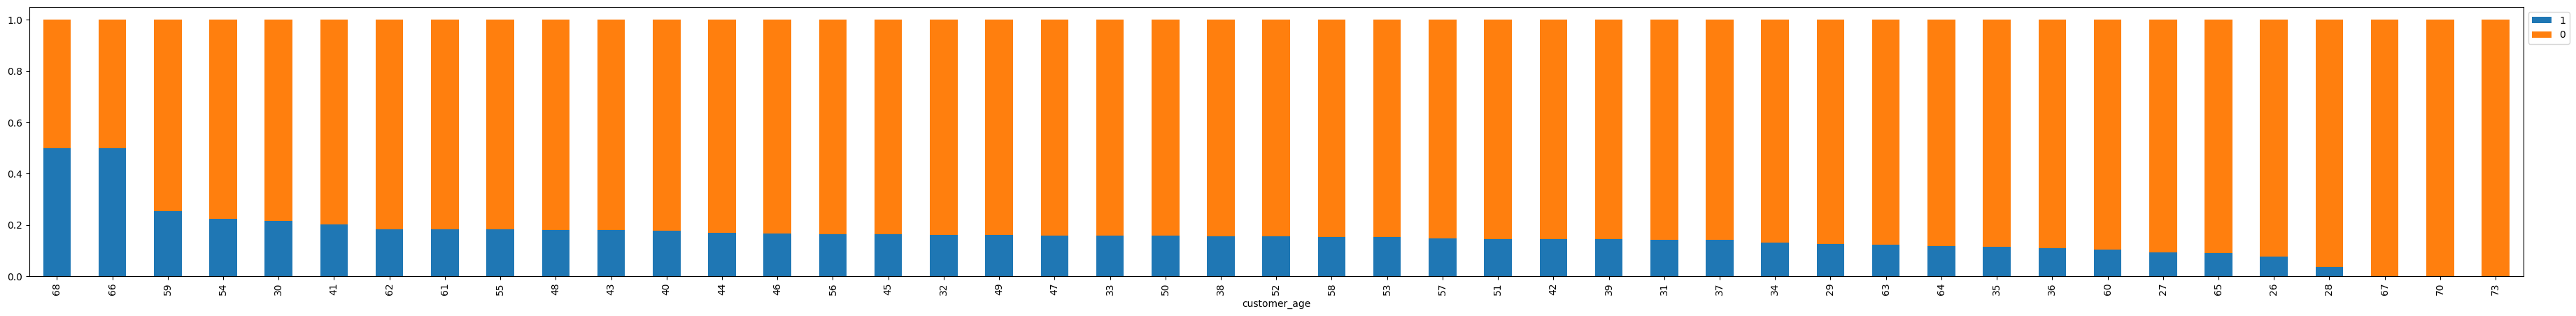

In [ ]:
stacked_barplot(df,'customer_age', 'attrition_flag')

Customer attrition increases with age.

## Data Pre-processing

In [ ]:
#dropping client id number as it is not useful for the model
df = df.drop(['clientnum'], axis=1)
df

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


In [ ]:
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)



In [ ]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

customer_age               0.020
dependent_count            0.000
months_on_book             3.812
total_relationship_count   0.000
months_inactive_12_mon     3.268
contacts_count_12_mon      6.211
credit_limit               9.717
total_revolving_bal        0.000
avg_open_to_buy            9.509
total_amt_chng_q4_q1       3.910
total_trans_amt            8.848
total_trans_ct             0.020
total_ct_chng_q4_q1        3.891
avg_utilization_ratio      0.000
dtype: float64

In [ ]:
#I decided to leave outliers as that has worked well for me on other exercises/projects and removing outliers may make the model not perform well with new data introduced (when thinking about this in terms of "Thera Bank")

In [ ]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,attrition_flag,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M
0,0,45,3,2,3,1,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,0,1,0,0,1
1,0,49,5,4,1,1,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,0,0,1,1,0
2,0,51,3,4,4,1,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,0,1,0,0,1
3,0,40,4,2,1,1,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,0,0,0,1,0
4,0,40,3,1,3,1,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,0,1,0,0,1
5,0,44,2,4,2,1,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311,0,1,0,0,1
6,0,51,4,NaN,5,3,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066,0,1,0,0,1
7,0,32,0,2,3,2,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048,0,0,0,0,1
8,0,37,3,1,3,1,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113,0,0,1,0,1
9,0,48,2,4,4,1,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144,0,0,1,0,1


In [ ]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

0   0.839
1   0.161
Name: attrition_flag, dtype: float64
--------------------------------------------------
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: customer_age, dtype: float64
--------------------------------------------------
3   0.270
2   0.262
1   0.181
4   0.155
0   0.089
5   0.042
Name: dependent_count, dtype: float64
--------------------------------------------------
4   0.363
2   0.234
1   0.173
3   0.118
5   0.060
6   0.052
Name: education_level, dtype: float64
--------------------------------------------------
1    0.352
2 

In [ ]:
#replace data so that categorical values are ordered, plus one hot encoding for non-ordered categorical variables
replaceStruct = {
                  'education_level': {'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6},
                  'income_category': {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5, 'abc':-1},
                  'card_category': {'Blue':1,'Silver':2,'Gold':3,'Platinum':4},
                  'attrition_flag': {'Existing Customer': 0,'Attrited Customer': 1}
                     }

oneHotCols = ['marital_status','gender']


In [ ]:
df=df.replace(replaceStruct)
#df=pd.get_dummies(df,columns=oneHotCols) -> commented out as this would not run with it in howevr marital status and gender are one hot encoded in the df
df.head(10)

,attrition_flag,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M
0,0,45,3,2,3,1,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,0,1,0,0,1
1,0,49,5,4,1,1,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,0,0,1,1,0
2,0,51,3,4,4,1,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,0,1,0,0,1
3,0,40,4,2,1,1,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,0,0,0,1,0
4,0,40,3,1,3,1,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,0,1,0,0,1
5,0,44,2,4,2,1,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311,0,1,0,0,1
6,0,51,4,NaN,5,3,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066,0,1,0,0,1
7,0,32,0,2,3,2,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048,0,0,0,0,1
8,0,37,3,1,3,1,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113,0,0,1,0,1
9,0,48,2,4,4,1,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   dependent_count           10127 non-null  int64   
 3   education_level           8608 non-null   category
 4   income_category           10127 non-null  category
 5   card_category             10127 non-null  category
 6   months_on_book            10127 non-null  int64   
 7   total_relationship_count  10127 non-null  int64   
 8   months_inactive_12_mon    10127 non-null  int64   
 9   contacts_count_12_mon     10127 non-null  int64   
 10  credit_limit              10127 non-null  float64 
 11  total_revolving_bal       10127 non-null  int64   
 12  avg_open_to_buy           10127 non-null  float64 
 13  total_amt_chng_q4_q1      10127 non-null  floa

## Missing value imputation




In [ ]:
#Willl do missing value imputation after splitting the data into train, test and validation to avoid data leakage
round(df.isnull().sum() / df.isnull().count() * 100, 2)

attrition_flag              0.000
customer_age                0.000
dependent_count             0.000
education_level            15.000
income_category             0.000
card_category               0.000
months_on_book              0.000
total_relationship_count    0.000
months_inactive_12_mon      0.000
contacts_count_12_mon       0.000
credit_limit                0.000
total_revolving_bal         0.000
avg_open_to_buy             0.000
total_amt_chng_q4_q1        0.000
total_trans_amt             0.000
total_trans_ct              0.000
total_ct_chng_q4_q1         0.000
avg_utilization_ratio       0.000
marital_status_Divorced     0.000
marital_status_Married      0.000
marital_status_Single       0.000
gender_F                    0.000
gender_M                    0.000
dtype: float64

In [ ]:
#splitting the data into train and test sets but first will copy the data
df1 = df.copy()

In [ ]:
#splitting the data into train and test sets, first step isolating the target variable
x = df1.drop('attrition_flag',axis=1)
y = df1.pop('attrition_flag')
print(x.info)
print(y.info)

<bound method DataFrame.info of        customer_age  dependent_count education_level income_category  \
0                45                3               2               3   
1                49                5               4               1   
2                51                3               4               4   
3                40                4               2               1   
4                40                3               1               3   
...             ...              ...             ...             ...   
10122            50                2               4               2   
10123            41                2             NaN               2   
10124            44                1               2               1   
10125            30                2               4               2   
10126            43                2               4               1   

      card_category  months_on_book  total_relationship_count  \
0                 1              39   

In [ ]:
#x = pd.get_dummies(x,drop_first=True) -> again, did not work but i kept checking the data and my columns were numerical

In [ ]:
#splitting the data and ensuring that relative class frequencies of target class is approximately preserved in train and test sets by using stratify
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=1,stratify=y)

In [ ]:
#Using SimpleImputer to replace NaN
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(x_train.select_dtypes(include='category').columns)
num_cols = list(x_train.select_dtypes(include=['int', 'float']).columns)

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
x_train[num_cols] = num_imputer.fit_transform(x_train[num_cols])
x_test[num_cols] = num_imputer.transform(x_test[num_cols])
#y_train[num_cols] = num_imputer.transform(y_train[num_cols])
#y_test[num_cols] = num_imputer.transform(y_test[num_cols])

# Impute categorial columns
cat_imputer = SimpleImputer(strategy='most_frequent')
x_train[cat_cols] = cat_imputer.fit_transform(x_train[cat_cols])
x_test[cat_cols] = cat_imputer.transform(x_test[cat_cols])

print(num_cols)
print(cat_cols)


['customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']
['education_level', 'income_category', 'card_category']


In [ ]:
# Checking that no column has missing values in train and test data
print(x_train.isna().sum())
print("-" * 30)
print(x_test.isna().sum())
print("-" * 30)

customer_age                0
dependent_count             0
education_level             0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
marital_status_Divorced     0
marital_status_Married      0
marital_status_Single       0
gender_F                    0
gender_M                    0
dtype: int64
------------------------------
customer_age                0
dependent_count             0
education_level             0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit              

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

I decided to choose Recall as the metric to optimize, as it would be worse to flag a customer as good, when in reality they are about to churn.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

## Model Building with original data

In [ ]:
# Now that the confusion matrix function and model scoring functions are created, I can start building out the models
# Will build 5 ensemble models - Bagging Classifier, Random Forest Classifier, AdaBoost Classifier, Gradient Boost Classifier, XGBoost Classifier
# Will start with default parameters then use hyperparameter tuning to optimize the model performance
# Metric of interest to maximize is Recall, because we want to minimize False Negatives (or a customer who is about to churn but is not flagged as churn risk)

Sample code for model building with original data

### Bagging Classifier

In [ ]:
# First need to set a base_estimator which is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
# Using my defined function to get metrics on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9968961625282167
Accuracy on test set :  0.9615004935834156
Recall on training set :  0.9850746268656716
Recall on test set :  0.8504098360655737
Precision on training set :  0.9955634427684117
Precision on test set :  0.9041394335511983


In [ ]:
# Result: Looking at my metrics, my first pass is actually not bad because the recall on the train and test set are high, however, I believe I can get the recall even higher

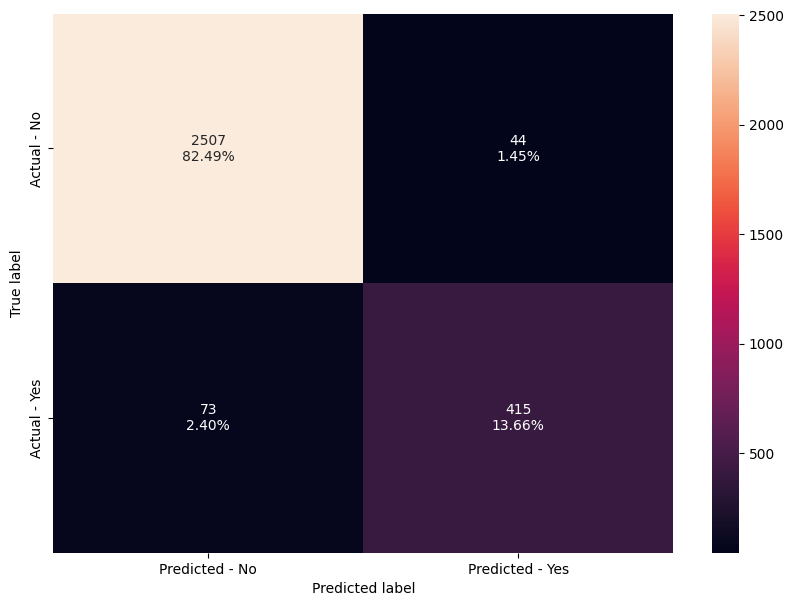

In [ ]:
# Using my defined function to see the confusion matrix
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [ ]:
# Training the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Using my defined function to get my metrics
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9549193813754524
Recall on training set :  1.0
Recall on test set :  0.7909836065573771
Precision on training set :  1.0
Precision on test set :  0.9168646080760094


In [ ]:
# Result: I believe when training set metrics are 1.0 that means the model is overfit

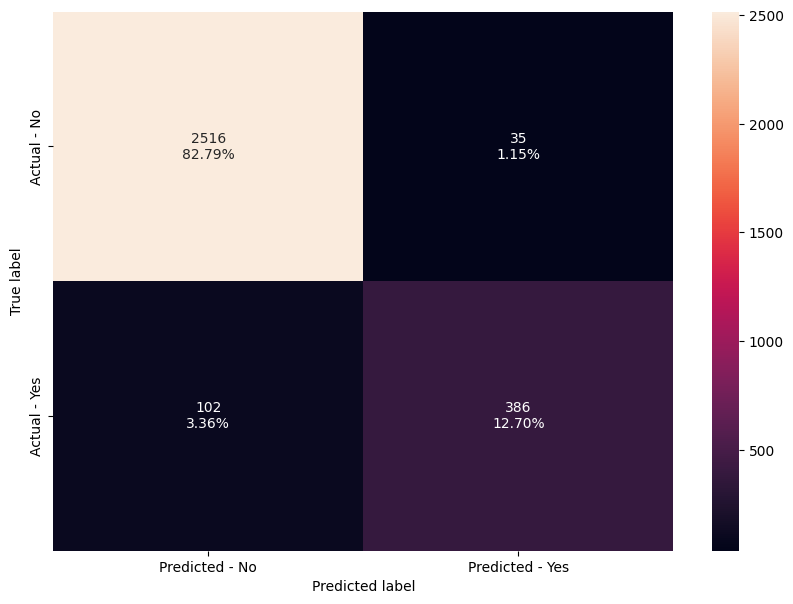

In [ ]:
# Using defined function to get confusion matrix
make_confusion_matrix(rf_estimator, y_test)

In [ ]:
# We are trying to prevent the scenario where customers chrun without being flagged as risk so this is not good to have 102 false negatives

In [ ]:
# Checking feature importances
print(pd.DataFrame(rf_estimator.feature_importances_,columns=["imp"],index = x_train.columns))

                           imp
customer_age             0.033
dependent_count          0.013
education_level          0.014
income_category          0.012
card_category            0.003
months_on_book           0.024
total_relationship_count 0.067
months_inactive_12_mon   0.025
contacts_count_12_mon    0.028
credit_limit             0.035
total_revolving_bal      0.107
avg_open_to_buy          0.035
total_amt_chng_q4_q1     0.060
total_trans_amt          0.172
total_trans_ct           0.182
total_ct_chng_q4_q1      0.101
avg_utilization_ratio    0.062
marital_status_Divorced  0.002
marital_status_Married   0.006
marital_status_Single    0.005
gender_F                 0.006
gender_M                 0.008


### AdaBoost Classifier

In [ ]:
#AdaBoost Classifier
ada = AdaBoostClassifier(random_state=1)
ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Using defined function to get metrics
ada_score = get_metrics_score(ada)

Accuracy on training set :  0.9571106094808126
Accuracy on test set :  0.9565646594274433
Recall on training set :  0.8410886742756805
Recall on test set :  0.8483606557377049
Precision on training set :  0.8862164662349676
Precision on test set :  0.8771186440677966


In [ ]:
# Result: Still not as high recall as bagging with default parameters and original data

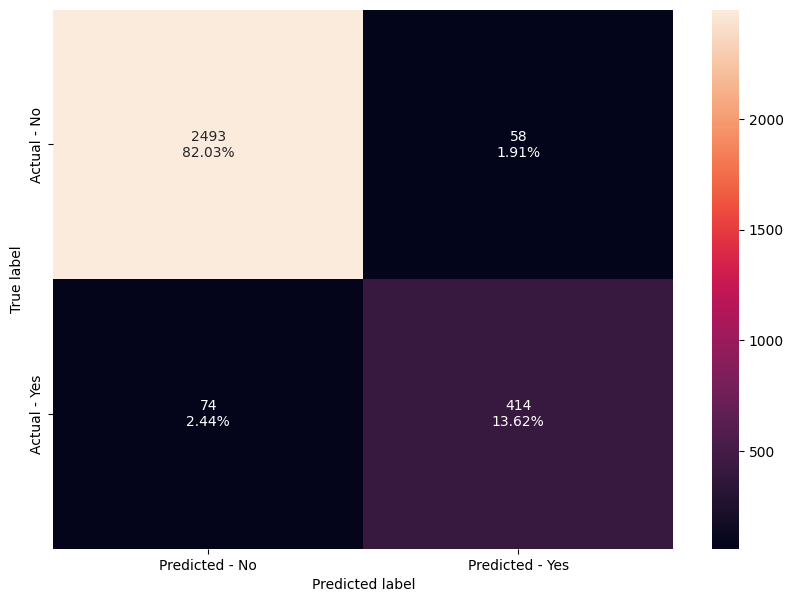

In [ ]:
#checking the AdaBoost confusion matrix
make_confusion_matrix(ada,y_test)

In [ ]:
# Checking feature importances
print(pd.DataFrame(ada.feature_importances_,columns=["imp"],index = x_train.columns))

                           imp
customer_age             0.040
dependent_count          0.000
education_level          0.000
income_category          0.000
card_category            0.000
months_on_book           0.000
total_relationship_count 0.040
months_inactive_12_mon   0.020
contacts_count_12_mon    0.080
credit_limit             0.020
total_revolving_bal      0.080
avg_open_to_buy          0.000
total_amt_chng_q4_q1     0.120
total_trans_amt          0.320
total_trans_ct           0.200
total_ct_chng_q4_q1      0.080
avg_utilization_ratio    0.000
marital_status_Divorced  0.000
marital_status_Married   0.000
marital_status_Single    0.000
gender_F                 0.000
gender_M                 0.000


### Gradient Boost Classifier



In [ ]:
# Running Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Checking Gradient Boost Metrics
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9755925507900677
Accuracy on test set :  0.9647910496873972
Recall on training set :  0.8858647936786654
Recall on test set :  0.8545081967213115
Precision on training set :  0.9591254752851711
Precision on test set :  0.9205298013245033


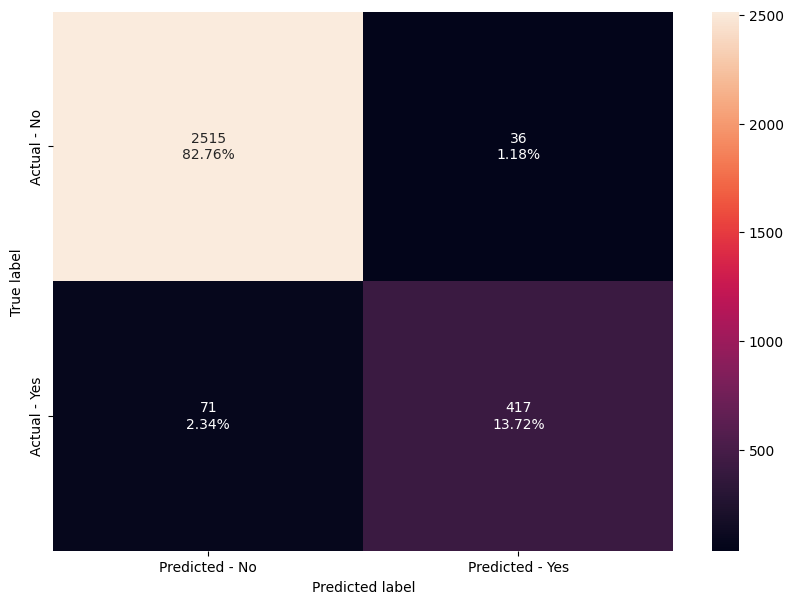

In [ ]:
# Checking confusion matrix
make_confusion_matrix(gbc,y_test)

In [ ]:
# Checking feature importances
print(pd.DataFrame(gbc.feature_importances_,columns=["imp"],index = x_train.columns))

                           imp
customer_age             0.020
dependent_count          0.000
education_level          0.000
income_category          0.000
card_category            0.001
months_on_book           0.003
total_relationship_count 0.087
months_inactive_12_mon   0.009
contacts_count_12_mon    0.017
credit_limit             0.001
total_revolving_bal      0.184
avg_open_to_buy          0.003
total_amt_chng_q4_q1     0.030
total_trans_amt          0.204
total_trans_ct           0.348
total_ct_chng_q4_q1      0.089
avg_utilization_ratio    0.000
marital_status_Divorced  0.000
marital_status_Married   0.002
marital_status_Single    0.000
gender_F                 0.000
gender_M                 0.001


### XGBoost Classifier

In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking metrics
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9743336623889437
Recall on training set :  1.0
Recall on test set :  0.9077868852459017
Precision on training set :  1.0
Precision on test set :  0.930672268907563


In [ ]:
#Result: I believe this is too overfitted

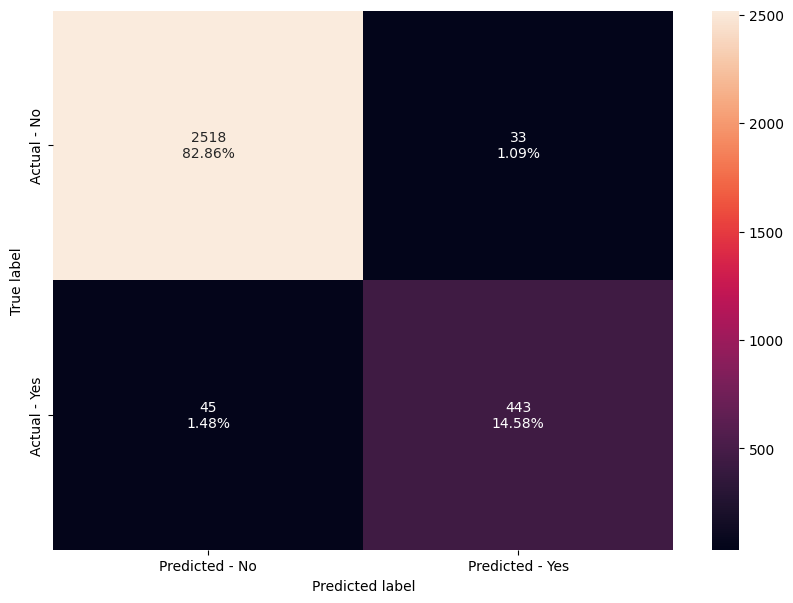

In [ ]:
# Checking confusion matrix
make_confusion_matrix(xgb,y_test)

In [ ]:
# Checking feature importances
print(pd.DataFrame(xgb.feature_importances_,columns=["imp"],index = x_train.columns))

                           imp
customer_age             0.042
dependent_count          0.011
education_level          0.011
income_category          0.010
card_category            0.020
months_on_book           0.014
total_relationship_count 0.116
months_inactive_12_mon   0.038
contacts_count_12_mon    0.027
credit_limit             0.018
total_revolving_bal      0.186
avg_open_to_buy          0.026
total_amt_chng_q4_q1     0.031
total_trans_amt          0.066
total_trans_ct           0.243
total_ct_chng_q4_q1      0.046
avg_utilization_ratio    0.020
marital_status_Divorced  0.005
marital_status_Married   0.020
marital_status_Single    0.010
gender_F                 0.038
gender_M                 0.000


## Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique, keeping sampling strategy 1 as that was provided in the default code
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

In [ ]:
# Checking shape and value counts to get an idea of what's changed after oversampling
print("Before OverSampling, Count of Label '1':{}".format(sum(y_train==1)))
print("Before OverSampling, Count of Label '0':{}\n".format(sum(y_train==0)))

print("After OverSampling, Count of Label '1':{}".format(sum(y_train_over==1)))
print("After OverSampling, Count of Label '0':{}\n".format(sum(y_train_over==0)))

print("After OverSampling, the shape of train_x :{}".format(x_train_over.shape))
print("After OverSampling, the shape of train_y :{}\n".format(y_train_over.shape))


Before OverSampling, Count of Label '1':1139
Before OverSampling, Count of Label '0':5949

After OverSampling, Count of Label '1':5949
After OverSampling, Count of Label '0':5949

After OverSampling, the shape of train_x :(11898, 22)
After OverSampling, the shape of train_y :(11898,)



### Oversampled Data: Bagging Classifier

In [ ]:
# Bagging classifier but with oversampled data
bagging_estimator_over=BaggingClassifier(random_state=1)
bagging_estimator_over.fit(x_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [ ]:
# Using my defined function to get metrics on train and test set
bagging_estimator_score_over=get_metrics_score(bagging_estimator_over)

Accuracy on training set :  0.996755079006772
Accuracy on test set :  0.9483382691674893
Recall on training set :  0.9894644424934153
Recall on test set :  0.8647540983606558
Precision on training set :  0.9903339191564148
Precision on test set :  0.8226120857699805


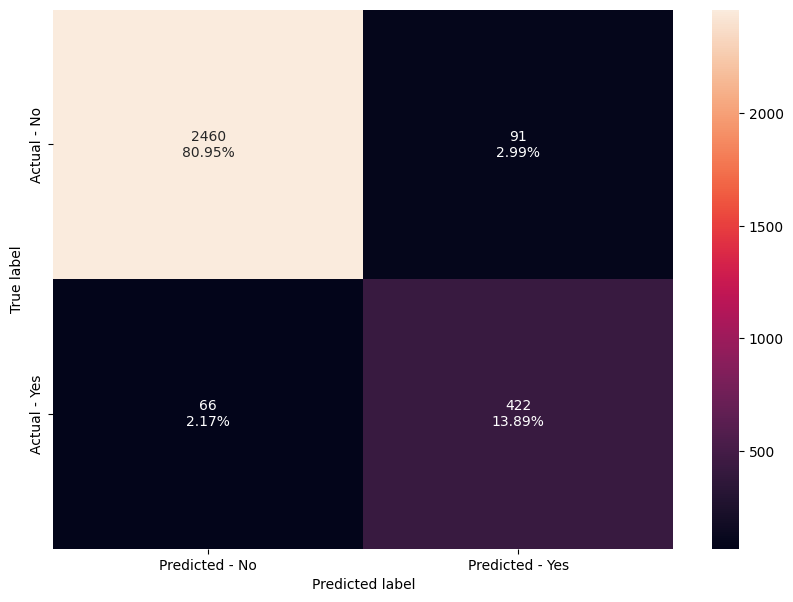

In [ ]:
# Using my defined function to see the confusion matrix
make_confusion_matrix(bagging_estimator_over,y_test)

### Oversampled Data: Random Forest



In [ ]:
# Training the random forest classifier on the oversampled data
rf_estimator_over = RandomForestClassifier(random_state=1)
rf_estimator_over.fit(x_train_over,y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
# Using my defined function to get my metrics
rf_estimator_score_over = get_metrics_score(rf_estimator_over)

Accuracy on training set :  1.0
Accuracy on test set :  0.9552484369858506
Recall on training set :  1.0
Recall on test set :  0.8299180327868853
Precision on training set :  1.0
Precision on test set :  0.8842794759825328


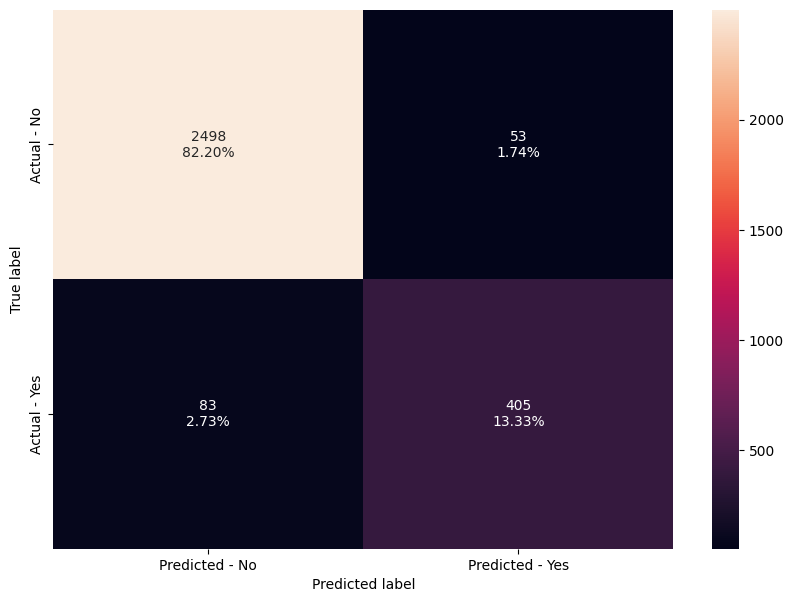

In [ ]:
# Using defined function to get confusion matrix
make_confusion_matrix(rf_estimator_over, y_test)

### Oversampled Data: AdaBoost Classifier

In [ ]:
#AdaBoost Classifier on oversampled data
ada_over = AdaBoostClassifier(random_state=1)
ada_over.fit(x_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

In [ ]:
#Using defined function to get metrics
ada_score_over = get_metrics_score(ada_over)

Accuracy on training set :  0.948645598194131
Accuracy on test set :  0.9466929911154985
Recall on training set :  0.8814749780509219
Recall on test set :  0.889344262295082
Precision on training set :  0.8142741281427412
Precision on test set :  0.8007380073800738


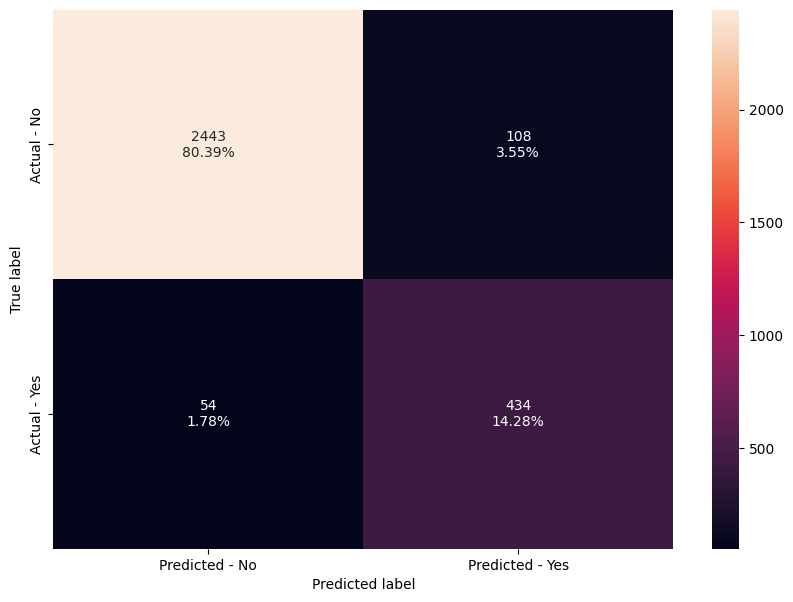

In [ ]:
#checking the AdaBoost confusion matrix
make_confusion_matrix(ada_over,y_test)

### Oversampled Data: Gradient Boost Classifier

In [ ]:
# Running Gradient Boost Classifier on oversampled data
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(x_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Checking Gradient Boost Metrics
gbc_score_over=get_metrics_score(gbc_over)

Accuracy on training set :  0.9696670428893905
Accuracy on test set :  0.9628167160250082
Recall on training set :  0.913081650570676
Recall on test set :  0.9098360655737705
Precision on training set :  0.8996539792387543
Precision on test set :  0.8654970760233918


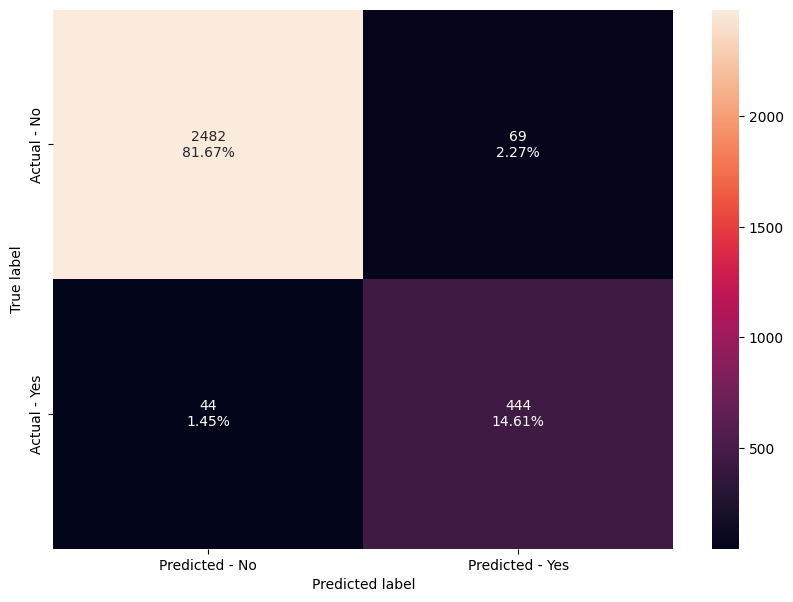

In [ ]:
# Checking confusion matrix
make_confusion_matrix(gbc_over,y_test)

### Oversampled Data: XGBoost Classifier

In [ ]:
# XGBoost Classifier on oversampled data
xgb_over = XGBClassifier(random_state=1)
xgb_over.fit(x_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking metrics
xgb_score_over=get_metrics_score(xgb_over)

Accuracy on training set :  1.0
Accuracy on test set :  0.9726883843369529
Recall on training set :  1.0
Recall on test set :  0.9159836065573771
Precision on training set :  1.0
Precision on test set :  0.9141104294478528


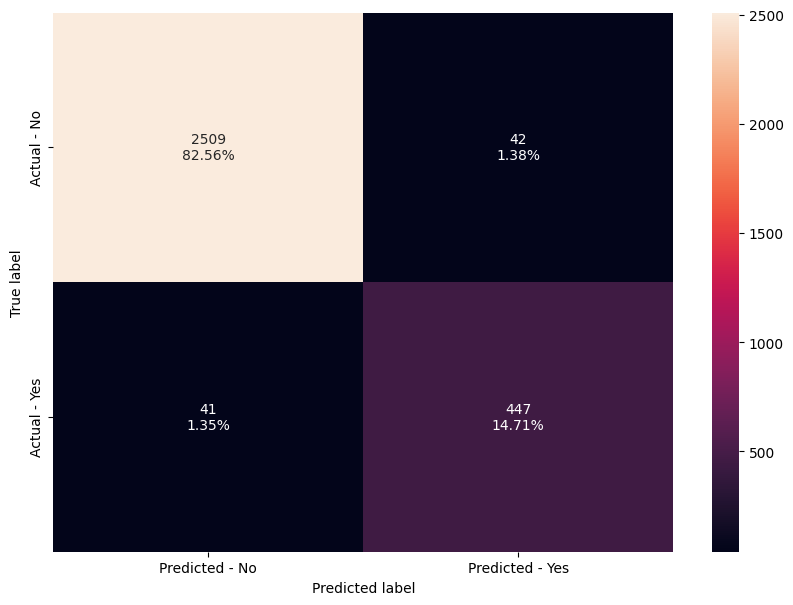

In [ ]:
# Checking confusion matrix
make_confusion_matrix(xgb_over,y_test)

## Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data, keeping sampling strategy = 1
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

In [ ]:
# Checking shape and value counts to get an idea of what's changed after undersampling
print("Before UnderSampling, Count of Label '1':{}".format(sum(y_train==1)))
print("Before UnderSampling, Count of Label '0':{}\n".format(sum(y_train==0)))

print("After UnderSampling, Count of Label '1':{}".format(sum(y_train_un==1)))
print("After UnderSampling, Count of Label '0':{}\n".format(sum(y_train_un==0)))

print("After UnderSampling, the shape of train_x :{}".format(x_train_un.shape))
print("After UnderSampling, the shape of train_y :{}\n".format(y_train_un.shape))

Before UnderSampling, Count of Label '1':1139
Before UnderSampling, Count of Label '0':5949

After UnderSampling, Count of Label '1':1139
After UnderSampling, Count of Label '0':1139

After UnderSampling, the shape of train_x :(2278, 22)
After UnderSampling, the shape of train_y :(2278,)



### Undersampled Data: Bagging Classifier

In [ ]:
# Bagging with understampled data
bagging_estimator_un=BaggingClassifier(random_state=1)
bagging_estimator_un.fit(x_train_un, y_train_un)

BaggingClassifier(random_state=1)

In [ ]:
# Using my defined function to get metrics on train and test set
bagging_estimator_score_un=get_metrics_score(bagging_estimator_un)

Accuracy on training set :  0.9524548532731377
Accuracy on test set :  0.9253043764396183
Recall on training set :  0.990342405618964
Recall on test set :  0.930327868852459
Precision on training set :  0.7757909215955984
Precision on test set :  0.7017001545595054


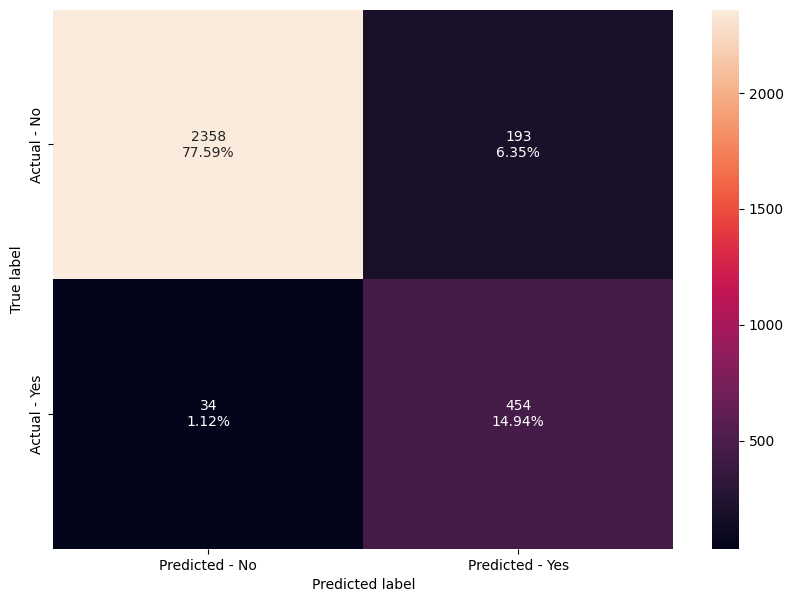

In [ ]:
# Using my defined function to see the confusion matrix
make_confusion_matrix(bagging_estimator_un,y_test)

### Undersampled Data: Random Forest Classifier

In [ ]:
# Training the random forest classifier on undersampled data
rf_estimator_un = RandomForestClassifier(random_state=1)
rf_estimator_un.fit(x_train_un,y_train_un)

RandomForestClassifier(random_state=1)

In [ ]:
# Using my defined function to get my metrics
rf_estimator_score_un = get_metrics_score(rf_estimator_un)

Accuracy on training set :  0.9589446952595937
Accuracy on test set :  0.9397828232971372
Recall on training set :  1.0
Recall on test set :  0.9569672131147541
Precision on training set :  0.7965034965034965
Precision on test set :  0.7424483306836248


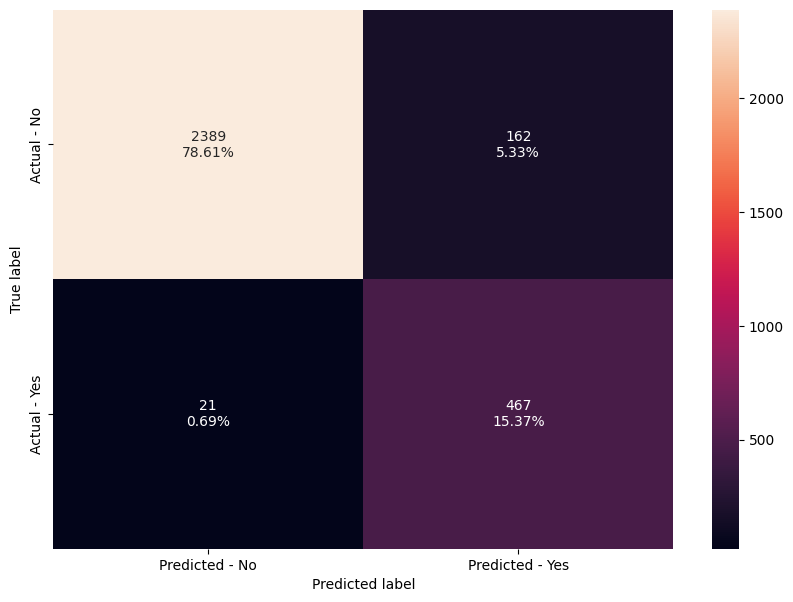

In [ ]:
# Using defined function to get confusion matrix
make_confusion_matrix(rf_estimator_un, y_test)

### Undersampled Data: AdaBoost

In [ ]:
#AdaBoost Classifier on undersampled data
ada_un = AdaBoostClassifier(random_state=1)
ada_un.fit(x_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

In [ ]:
#Using defined function to get metrics
ada_score_un = get_metrics_score(ada_un)

Accuracy on training set :  0.9366534988713319
Accuracy on test set :  0.928923988153998
Recall on training set :  0.95171202809482
Recall on test set :  0.9426229508196722
Precision on training set :  0.7334235453315291
Precision on test set :  0.7098765432098766


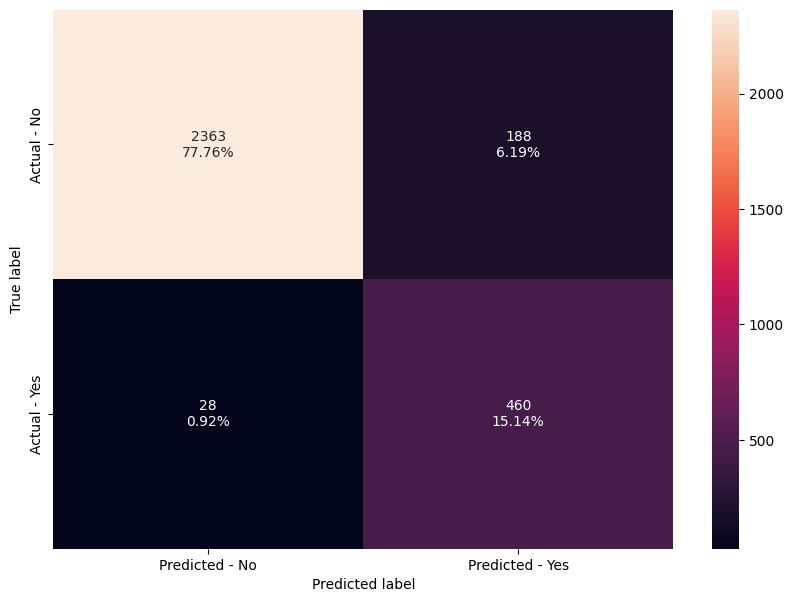

In [ ]:
#checking the AdaBoost confusion matrix
make_confusion_matrix(ada_un,y_test)

### Undersampled Data: Gradient Boost

In [ ]:
# Running Gradient Boost Classifier on the undersampled data
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(x_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Checking Gradient Boost Metrics
gbc_score_un=get_metrics_score(gbc_un)

Accuracy on training set :  0.9559819413092551
Accuracy on test set :  0.9437314906219151
Recall on training set :  0.9762949956101844
Recall on test set :  0.9590163934426229
Precision on training set :  0.7959914101646385
Precision on test set :  0.7560581583198708


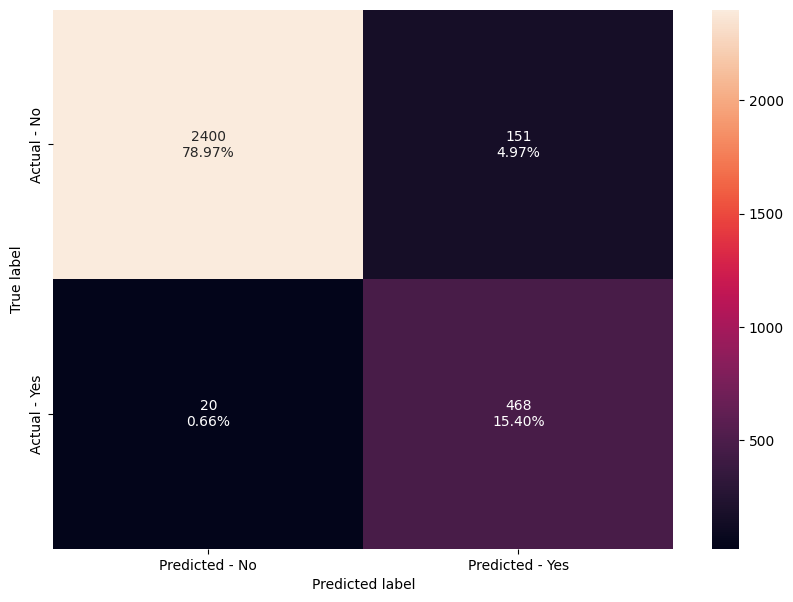

In [ ]:
# Checking confusion matrix
make_confusion_matrix(gbc_un,y_test)

### Undersampled Data: XGBoost

In [ ]:
# XGBoost Classifier on undersampled data
xgb_un = XGBClassifier(random_state=1)
xgb_un.fit(x_train_un,y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking metrics
xgb_score_un=get_metrics_score(xgb_un)

Accuracy on training set :  0.9655756207674944
Accuracy on test set :  0.9463639355051003
Recall on training set :  1.0
Recall on test set :  0.9610655737704918
Precision on training set :  0.8235719450469993
Precision on test set :  0.765089722675367


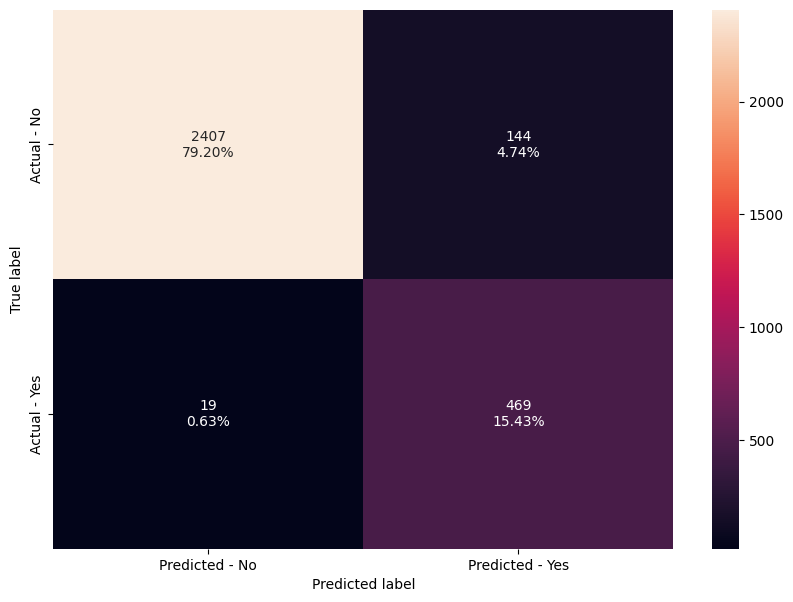

In [ ]:
# Checking confusion matrix
make_confusion_matrix(xgb_un,y_test)

## HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

### Hyperparameter Tuning: Bagging

In [ ]:
#accidentally did not bring this into the initial library import so bringing it in now
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setting up bagging classifier for hyperparameter tuning
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Using the provided grid of parameters:
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# setting up a type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# running grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [ ]:
#Using my defined function to evaluation metrics
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9998589164785553
Accuracy on test set :  0.9661072721289898
Recall on training set :  0.9991220368744512
Recall on test set :  0.8647540983606558
Precision on training set :  1.0
Precision on test set :  0.9193899782135077


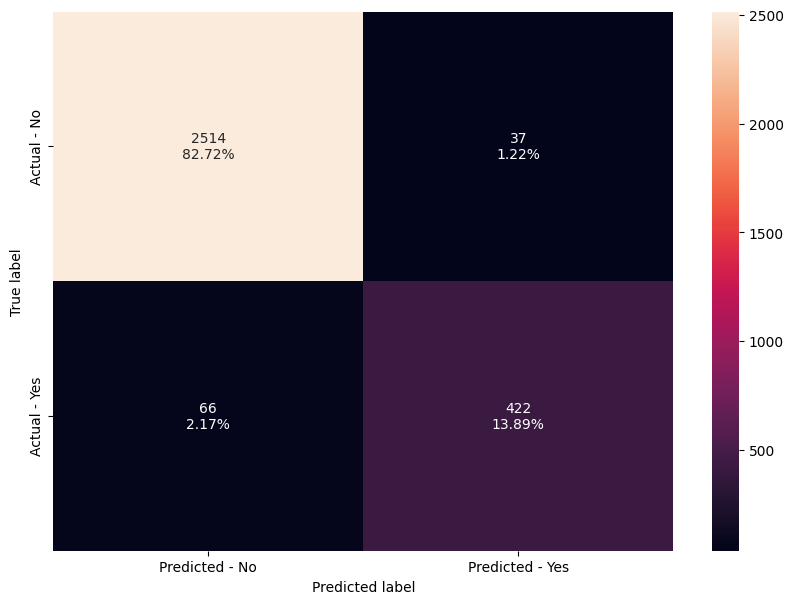

In [ ]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Hyperparameter Tuning: Random Forest

In [ ]:
# Setting up random forest classifier for hyperparameter tuning
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Using provided grid of parameters
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [ ]:
#Using my defined function to evaluation metrics
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9976015801354402
Accuracy on test set :  0.9532741033234616
Recall on training set :  0.9850746268656716
Recall on test set :  0.7786885245901639
Precision on training set :  1.0
Precision on test set :  0.9178743961352657


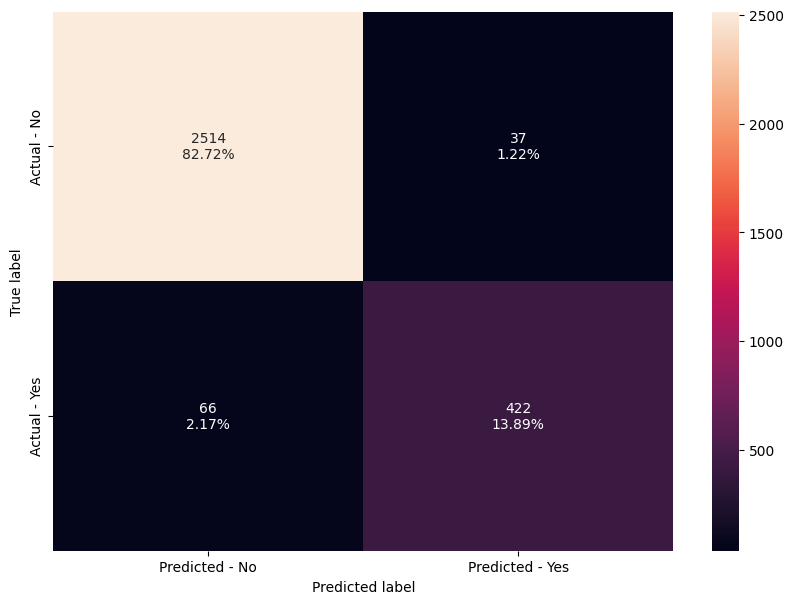

In [ ]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Hyperparameter Tuning: AdaBoost

In [ ]:
# Tuning AdaBoost Model
ada_tuned = AdaBoostClassifier(random_state=1)

# Using provided grid of parameters
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=80, random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
ada_tuned_score=get_metrics_score(ada_tuned)

Accuracy on training set :  0.9906884875846501
Accuracy on test set :  0.9684106614017769
Recall on training set :  0.9675153643546971
Recall on test set :  0.8975409836065574
Precision on training set :  0.9743589743589743
Precision on test set :  0.9049586776859504


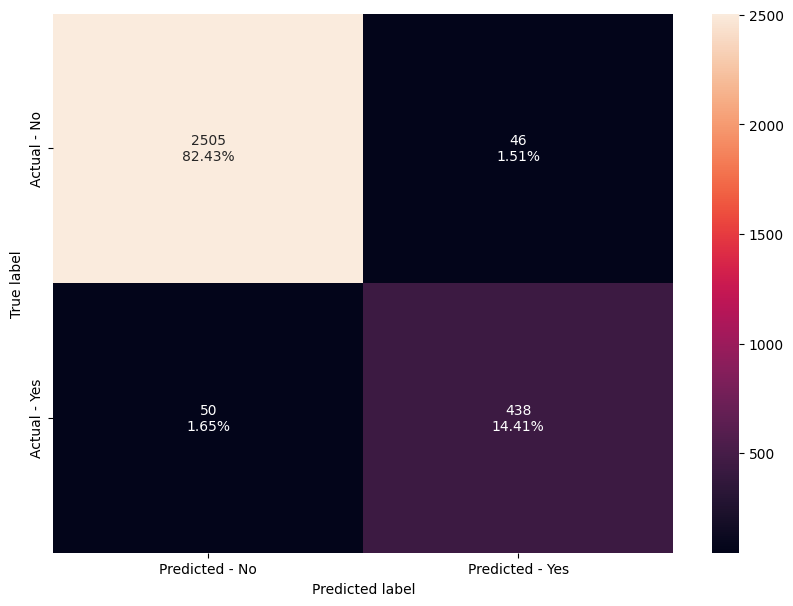

In [ ]:
make_confusion_matrix(ada_tuned,y_test)

### Hyperparameter Tuning: Gradient Boost

In [ ]:
#using AdaBoost classifier as the estimator for initial predictions
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(x_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
#using function to get metrics
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.9757336343115124
Accuracy on test set :  0.9664363277393879
Recall on training set :  0.8849868305531168
Recall on test set :  0.8545081967213115
Precision on training set :  0.9609151572926596
Precision on test set :  0.9308035714285714


In [ ]:
# Tuning Gradient Boost
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Using provided gride of parameters
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=1)

In [ ]:
#using function to get metrics
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9889954853273137
Accuracy on test set :  0.9753208292201382
Recall on training set :  0.9508340649692713
Recall on test set :  0.9098360655737705
Precision on training set :  0.9800904977375565
Precision on test set :  0.9347368421052632


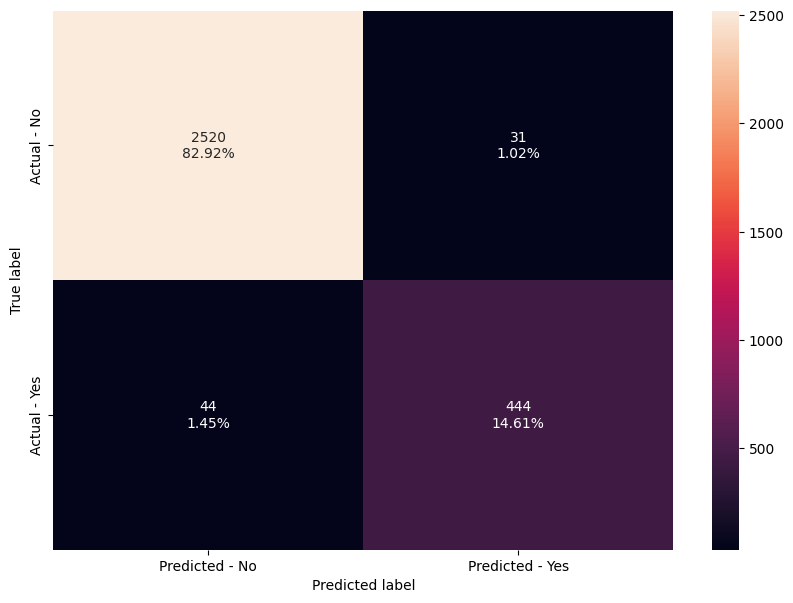

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

In [ ]:
#Unfortunately I need to skip XGBoost as it is taking way too long to execute

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
dtree = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7585787155112451:


### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
dtree_over = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=dtree_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5]),
                                        'max_leaf_nodes': [10, 15],
                                        'min_impurity_decrease': [0.0001,
                                                                  0.001],
                                        'min_samples_leaf': [1, 4, 7]},
                   random_state=1, scoring=make_scorer(recall_score))

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
dtree_un = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=dtree_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.9701445243063607:


## Model Comparison and Final Model Selection

In [ ]:
# defining list of models
models = [bagging_estimator, bagging_estimator_over,bagging_estimator_un,bagging_estimator_tuned, rf_estimator_over,rf_estimator_un,rf_estimator_tuned,ada,ada_over, ada_un,ada_tuned,gbc,gbc_over,gbc_un,gbc_tuned,xgb,xgb_over,xgb_un] #for some reason, I could not add rf_estimator to the list however the recall was very bad anyways

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame= pd.DataFrame({'Model':['bagging_estimator', 'bagging_estimator_over','bagging_estimator_un','bagging_estimator_tuned', 'rf_estimator_over','rf_estimator_un','rf_estimator_tuned','ada','ada_over', 'ada_un','ada_tuned','gbc','gbc_over','gbc_un','gbc_tuned','xgb','xgb_over','xgb_un'],
                               'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test,
                               'Train_Recall': recall_train, 'Test_Recall': recall_test,
                               'Train Precision': precision_train, 'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train Precision,Test_Precision
0,bagging_estimator,1.000,0.960,0.990,0.850,1.000,0.900
1,bagging_estimator_over,1.000,0.950,0.990,0.860,0.990,0.820
2,bagging_estimator_un,0.950,0.930,0.990,0.930,0.780,0.700
3,bagging_estimator_tuned,1.000,0.970,1.000,0.860,1.000,0.920
4,rf_estimator_over,1.000,0.960,1.000,0.830,1.000,0.880
5,rf_estimator_un,0.960,0.940,1.000,0.960,0.800,0.740
6,rf_estimator_tuned,1.000,0.950,0.990,0.780,1.000,0.920
7,ada,0.960,0.960,0.840,0.850,0.890,0.880
8,ada_over,0.950,0.950,0.880,0.890,0.810,0.800
9,ada_un,0.940,0.930,0.950,0.940,0.730,0.710


Observations:


*   **bagging_estimator:** overfit on training accuracy, and lower test recall
*   **bagging_estimator_over:** overfit on training accuracy, and lower test recall
*   **bagging_estimator_un:** good scores on train recall and test recall
*   **bagging_estimator_tuned:** overfitting on training accuracy

*   **rf_estimator_over:**overfitting on training accuracy
*   **rf_estimator_un:** overfitting on train recall
*  ** rf_estimator_tuned:** overfitting on training accuracy

*   **ada:** lower scores on train recall and test recall, however test recall is better than train
*   **ada_over:** lower scores on train recall and test recall, however test recall is better than train
*   **ada_un:** good scores for recall, but much lower for precision
*   **ada_tuned:** high scores all around and not overfit

*   **gbc:**lower scores on train recall and test recall
*   **gbc_over:** high scores, and identical train recall and test recall
*   **gbc_un:**	very good train recall and test recall, but lower precision
*  ** gbc_tuned:** another model with high scores

*   **xgb:** overfitting on training accuracy and train recall
*   **xgb_over:**	overfitting on training accuracy and train recall
*   **xgb_un:**	overfitting on train recall



















### Test set final performance

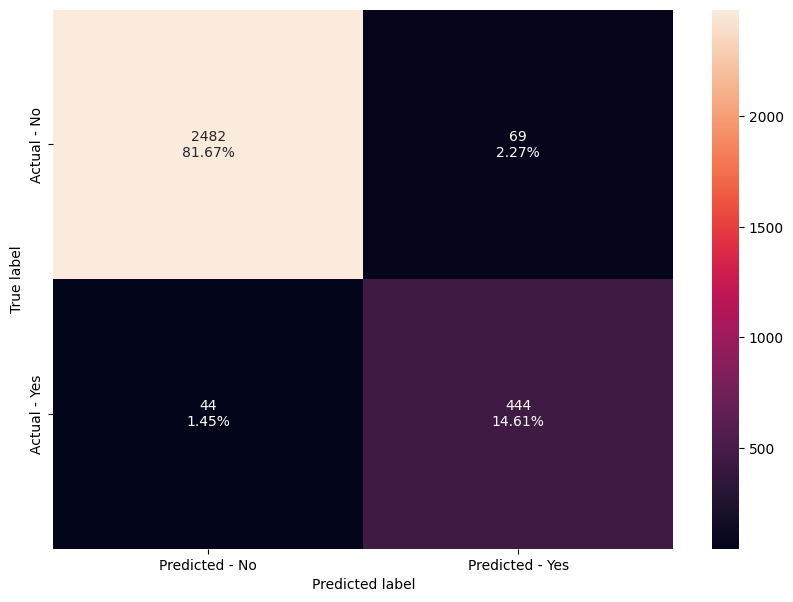

In [ ]:
make_confusion_matrix(gbc_over,y_test)


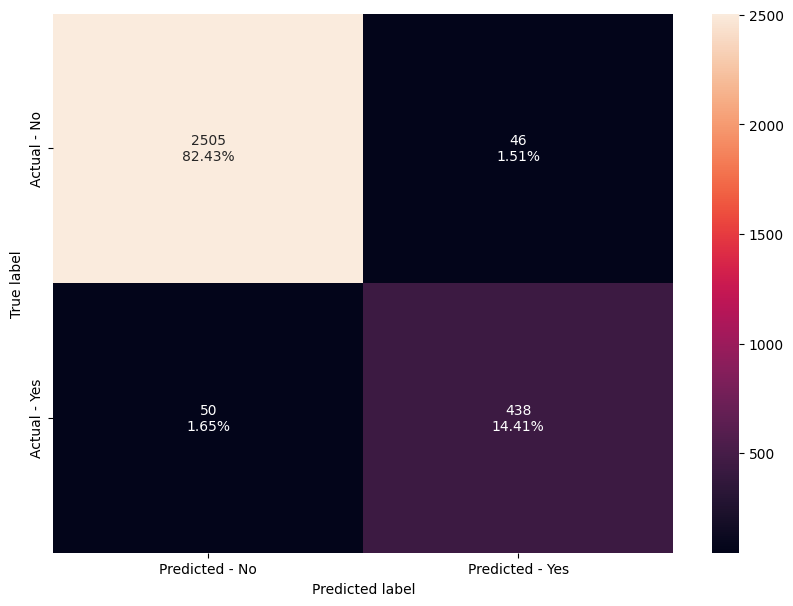

In [ ]:
make_confusion_matrix(ada_tuned,y_test)

**I know the objective is to pick the model with the best recall, however, the ada_tuned model has overall better performance and still has very good recall. From a business perspective, it would make more sense to choose ada_tuned model because it is more well rounded and not only has lower false negatives (compared to the remaining 16 models) but also lower false positives (compared to gbc_over which is the "runner up")**

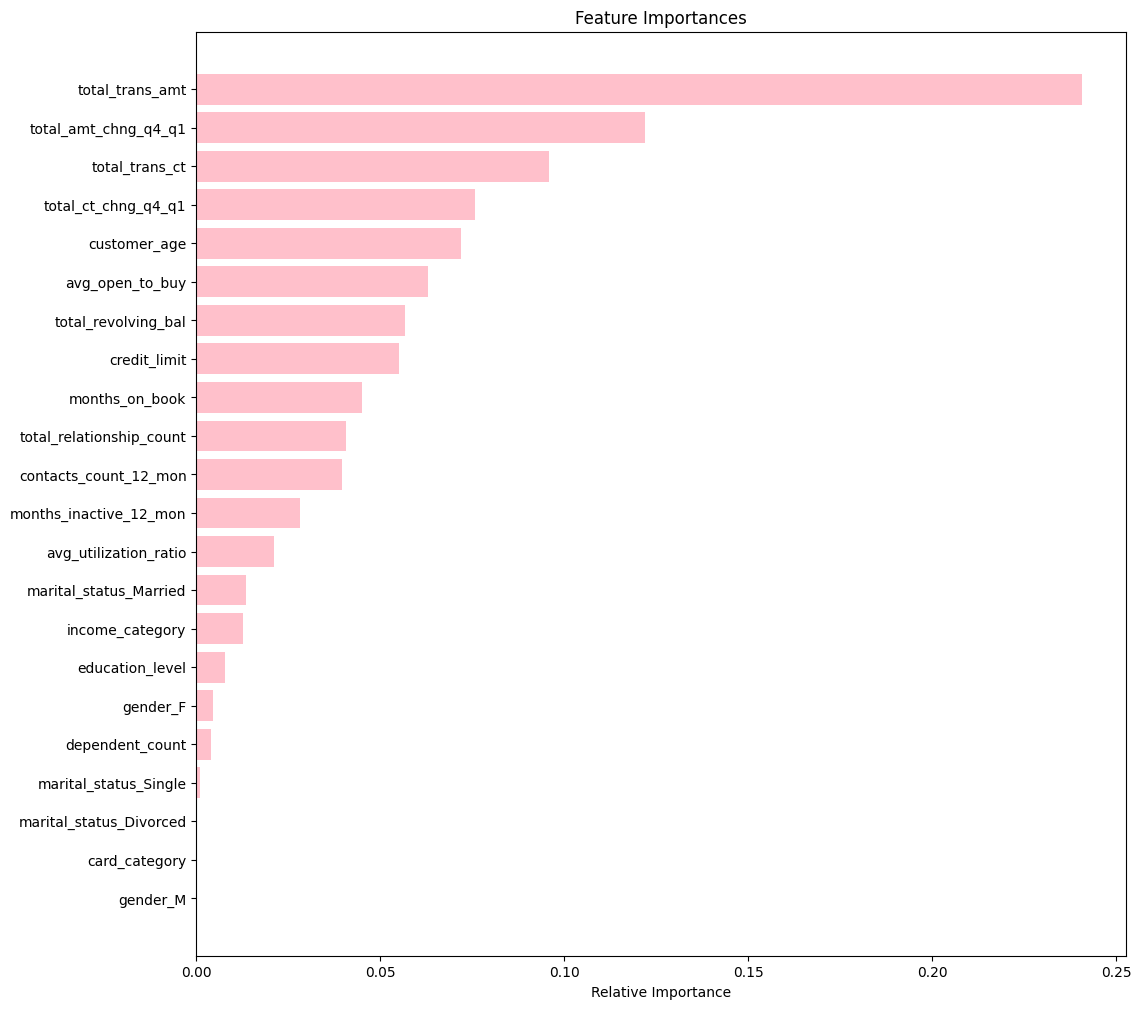

In [ ]:
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Business Insights and Conclusions

According to the model, the top most important features are:

total_trans_amt

total_amt_chng_q4_q1

total_trans_ct

total_ct_chng_q4_q1

customer_age

avg_open_to_buy

The least important features are:

income category

education

dependents

gender

With this in mind, I'd recommend the bank to investigate when customers activity slows down and they do not have as much change in transaction amounts and counts. This makes sense because when people stop using their credit cards as much, they will probably start to think about leaving the service.

Other features to keep in mind is customer age, as this was an important feature in predicting customers' leaving the credit card service. According to the EDA, as customer age increases, so does the likelihood of leaving the credit card service. The bank can create specific programs to incentivize customers to stick with the bank as they age.

Finally, features such as income category, education level, dependents, and gender did not end up being important features in the model. To preserve the bank's resources, I'd recommend not to focus on programs tailored to these traits, and focus more closely on transaction activity and age.


***

In [ ]:
%%shell
jupyter nbconvert --to html ///content/ETMT_Project_LearnerNotebook_FullCode_AZiegler.ipynb

[NbConvertApp] Converting notebook ///content/ETMT_Project_LearnerNotebook_FullCode_AZiegler.ipynb to html
[NbConvertApp] Writing 2563854 bytes to /content/ETMT_Project_LearnerNotebook_FullCode_AZiegler.html
